<a href="https://colab.research.google.com/github/kristacahayani/Project_Kalbe_Nutritionals/blob/main/Project_Kalbe_Nutritionals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction and Customer Segmentation Project at Kalbe Nutritionals

### IMPORT LIBRARY

In [ ]:
#Data Preprocessing Library
import numpy as np
import pandas as pd

#Machine Learning Library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

# import time series library
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#Visualization Library
!pip install pandas matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

### IMPORT DATA

In [ ]:
df_customer = pd.read_csv('/content/Customer.csv', delimiter=';')
df_product = pd.read_csv('/content/Product.csv', delimiter=';')
df_store = pd.read_csv('/content/Store.csv', delimiter=';')
df_transaction = pd.read_csv('/content/Transaction.csv', delimiter=';')

### DATA PREPARATION

##### Customer

In [ ]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


- *Mengecek nilai-nilai yang hilang*

In [ ]:
#missing value checking
missing_values = df_customer.isnull().sum()
print("Number of missing values:", missing_values)

Number of missing values: CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64


In [ ]:
df_customer[df_customer['Marital Status'].isnull()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4
415,416,27,1,NaN,"3,43"
442,443,33,1,NaN,"9,28"


In [ ]:
#missing value drop
df_customer = df_customer.dropna(subset=['Marital Status'])

In [ ]:
df_customer.shape

(444, 5)

- *Mengecek nilai duplikat*

In [ ]:
df_customer.duplicated().sum()

0

- *Checking type data*

In [ ]:
df_customer.dtypes

CustomerID         int64
Age                int64
Gender             int64
Marital Status    object
Income            object
dtype: object

##### Product

In [ ]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


- *Mengecek nilai-nilai yang hilang*

In [ ]:
#missing value checking
missing_values = df_product.isnull().sum()
print("Number of missing values:", missing_values)

Number of missing values: ProductID       0
Product Name    0
Price           0
dtype: int64


- *Mengecek nilai duplicate*

In [ ]:
df_product.duplicated().sum()

0

- *Checking type data*

In [ ]:
df_product.dtypes

ProductID       object
Product Name    object
Price            int64
dtype: object

##### Store

In [ ]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
df_store.dtypes

StoreID        int64
StoreName     object
GroupStore    object
Type          object
Latitude      object
Longitude     object
dtype: object

- *Mengecek nilai-nilai yang hilang*

In [ ]:
#missing value checking
missing_values = df_store.isnull().sum()
print("Number of missing values:", missing_values)

Number of missing values: StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64


- *Mengecek nilai duplicate*

In [ ]:
df_store.duplicated().sum()

0

- *checking type data*

In [ ]:
df_store.dtypes

StoreID        int64
StoreName     object
GroupStore    object
Type          object
Latitude      object
Longitude     object
dtype: object

##### Transaction

In [ ]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


- *Mengecek nilai-nilai yang hilang*

In [ ]:
#missing value checking
missing_value = df_transaction.isnull().sum()
print('Number of Missing Value:', missing_value)

Number of Missing Value: TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64


- *Mengecek nilai duplicate*

In [ ]:
df_transaction[df_transaction.TransactionID == 'TR71313']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,21/05/2022,P1,8800,10,88000,8
3336,TR71313,401,30/08/2022,P3,7500,6,45000,11
3722,TR71313,370,26/09/2022,P3,7500,2,15000,3


In [ ]:
#duplicate checking
df_transaction.duplicated().sum()

0

- *Checking type data*

In [ ]:
df_transaction.dtypes

TransactionID    object
CustomerID        int64
Date             object
ProductID        object
Price             int64
Qty               int64
TotalAmount       int64
StoreID           int64
dtype: object

##### Mengubah tipe data tanggal ke dalam format 'datetime'

In [ ]:
#change data type
df_customer['Income'] = df_customer['Income'].str.replace(',', '.').astype('float')
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '.').astype('float')
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '.').astype('float')
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

##### Menggabungkan Semua Data

In [ ]:
#merge data
df_merge = pd.merge(df_customer, df_transaction, on = 'CustomerID')
df_merge = pd.merge(df_merge, df_product.drop(columns = 'Price'), on = 'ProductID')
df_merge = pd.merge(df_merge, df_store, on = 'StoreID')
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.57,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.08,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643


## MODELING

### Time Series Forecasting

**Problem Statement:** As a Data Scientist at Kalbe Nutritionals, you have been tasked by the inventory teams to assist in predicting the sales quantity of the entire range of Kalbe products.

**Objective:** The goal of this project is to develop a forecasting model that can predict the daily sales quantity of Kalbe products. This model will be utilized to generate estimates of the quantity of products that will be sold in the future.

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Or, only disable specific warnings based on category
# Example: Disabling DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.57,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.08,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      4976 non-null   int64         
 1   Age             4976 non-null   int64         
 2   Gender          4976 non-null   int64         
 3   Marital Status  4976 non-null   object        
 4   Income          4976 non-null   float64       
 5   TransactionID   4976 non-null   object        
 6   Date            4976 non-null   datetime64[ns]
 7   ProductID       4976 non-null   object        
 8   Price           4976 non-null   int64         
 9   Qty             4976 non-null   int64         
 10  TotalAmount     4976 non-null   int64         
 11  StoreID         4976 non-null   int64         
 12  Product Name    4976 non-null   object        
 13  StoreName       4976 non-null   object        
 14  GroupStore      4976 non-null   object        
 15  Type

In [ ]:
#Convert the "Date" column to datetime data type with the specified format
df_merge['Date'] = pd.to_datetime(df_merge['Date'], format='%Y-%m-%d')

##### Calculate Total Quantity per Day

In [ ]:
df_totalquantity = df_merge.groupby('Date')["Qty"].sum().reset_index()

In [ ]:
df_totalquantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [ ]:
df_totalquantity.set_index('Date', inplace=True)

In [ ]:
#Model regresi: time series
df_regresi = df_merge.groupby('Date').agg({'Qty':'sum'}).reset_index()
df_regresi

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


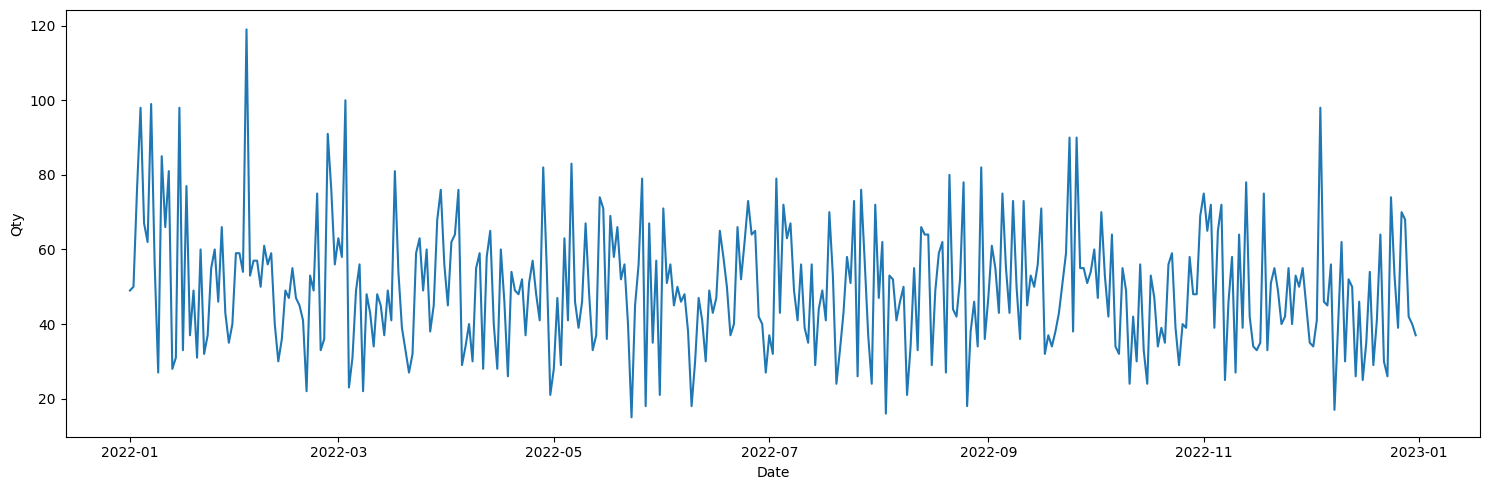

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = 'Date', y = 'Qty', data = df_regresi)
plt.tight_layout()

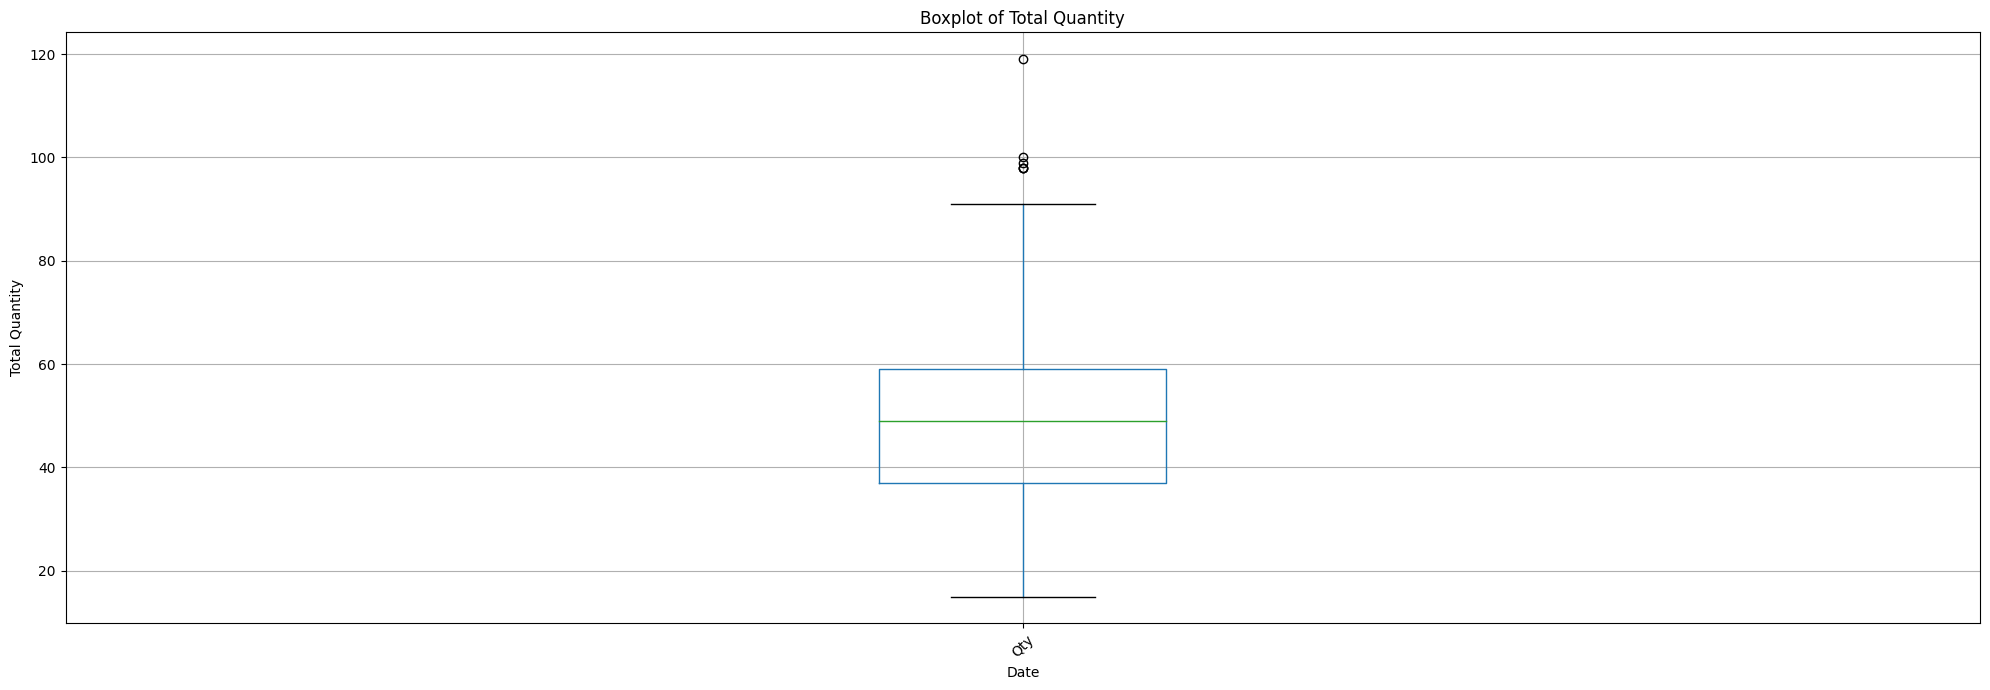

In [ ]:
#Assuming df_totalquantity is your DataFrame with 'Date' as the index
df_totalquantity.boxplot()
plt.title('Boxplot of Total Quantity')
plt.ylabel('Total Quantity')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Stationary Test

H0: It is non-stationary
H1: It is stationary

p-value <= 0.05 so H0 rejected.
p-value > 0.05 so H0 accepted.

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [ ]:
adfuller_test(df_totalquantity['Qty'])

ADF Test Statistic : -19.091513872408132
p-value : 0.0
#Lags Used : 0
Number of Observations : 364
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


data is already stationary.

Now looking the p, d and q value for ARIMA

#### Choose best p, d, and q

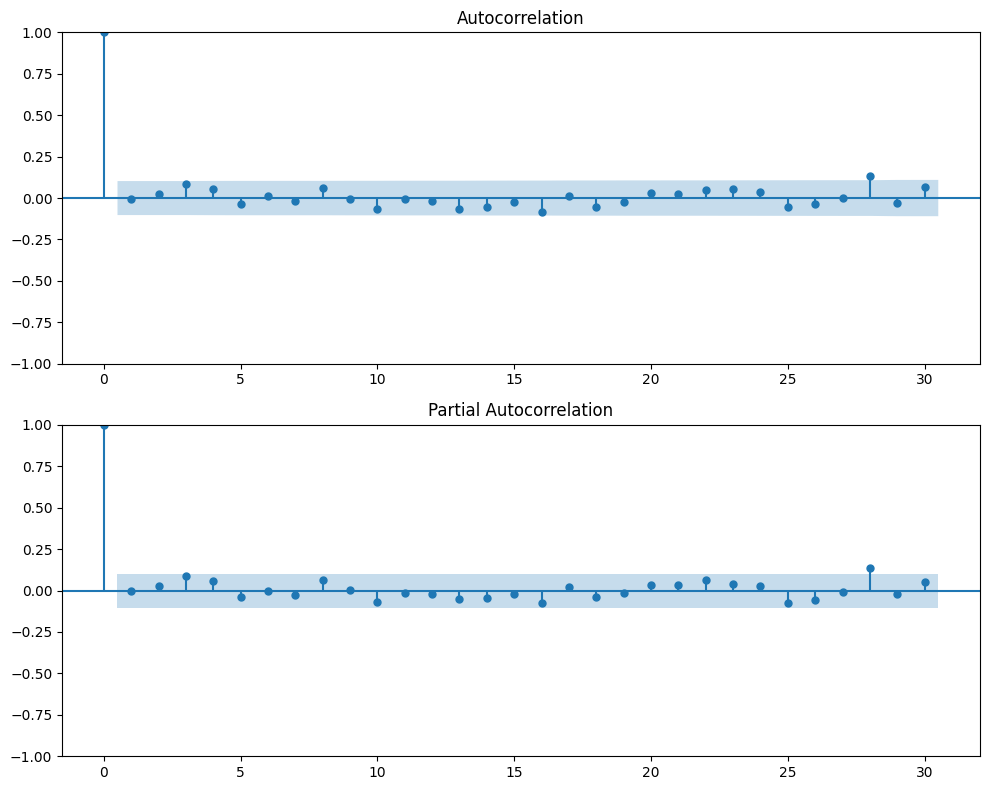

In [ ]:
#Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_totalquantity['Qty'], lags=30, ax=ax1)
plot_pacf(df_totalquantity['Qty'], lags=30, ax=ax2)

plt.tight_layout()
plt.show()

p = 4 q = 4 d = 0

In [ ]:
aic_scores = []
# Fit the ARIMA model
model = ARIMA(df_totalquantity['Qty'], order=(4,0,4))
model_fit = model.fit()
# Add AIC score to the list
aic_scores.append({'par': '(4,0,4)', 'aic': model_fit.aic})

In [ ]:
aic_scores

[{'par': '(4,0,4)', 'aic': 3097.6847072257374}]

grid search hyperparameter tuning

In [ ]:
from itertools import product

# Define ranges for p, d, and q
p = range(0, 5)  # 0 to 7
d = range(0, 3)  # 0 to 2
q = range(0, 5)  # 0 to 7

# Use the product function from itertools
# to create combinations of p, d, and q
pdq = list(product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 2, 0), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4)]


Manual grid search to find the optimal combination of parameters (p, d, q) for an ARIMA model based on the lowest AIC score.

In [ ]:
#Splitting data into training and testing with ratio 8 : 2
data_train = df_totalquantity[:292]["Qty"]
data_test = df_totalquantity[292:]['Qty']

#Creating a list to store AIC scores
aic_scores = []

#Performing manual grid search to find optimal p, d, q
for param in pdq:
    # Fitting the ARIMA model
    model = ARIMA(data_train, order=param)
    model_fit = model.fit()
    # Adding AIC score to the list
    aic_scores.append({'par': param, 'aic': model_fit.aic})

#Finding the smallest AIC score
best_aic = min(aic_scores, key=lambda x: x['aic'])

print(best_aic)

#Creating an ARIMA model with the best p, d, and q from grid search
model = ARIMA(data_train, order=(best_aic['par']))
model_fit = model.fit()

#Making predictions for the next 73 days (testing data)
preds = model_fit.forecast(73)

{'par': (0, 1, 1), 'aic': 2483.175576626819}


<Axes: >

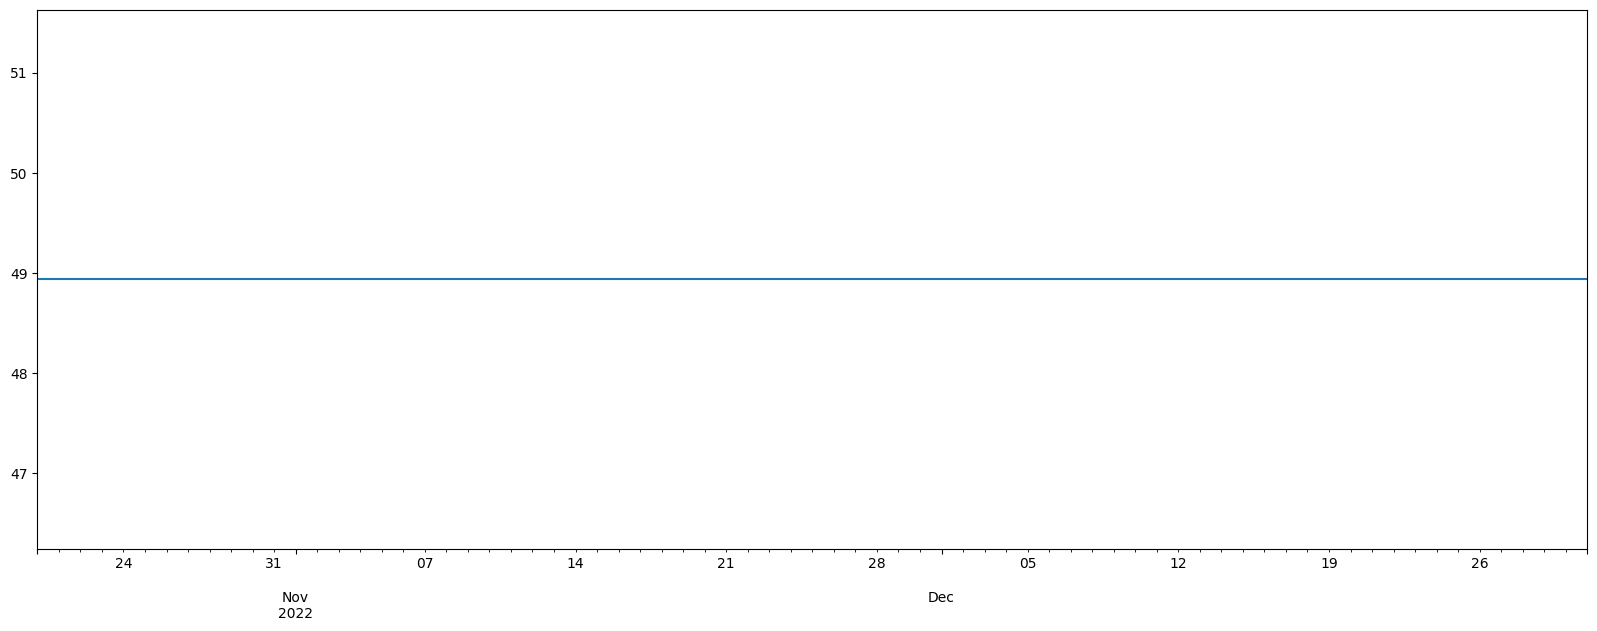

In [ ]:
preds.plot()

**auto arima**

choose p, d, and q automatic

In [ ]:
import pmdarima as pm

auto_arima = pm.auto_arima(data_train,stepwise=False, seasonal=False)
forecast = auto_arima.predict(n_periods=73)

auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1244.943
Date:                Wed, 08 Nov 2023   AIC                           2495.886
Time:                        07:20:30   BIC                           2506.916
Sample:                    01-01-2022   HQIC                          2500.304
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000    4.8e-05   2.08e+04      0.000       1.000       1.000
ma.L1         -0.9830      0.016    -60.722      0.000      -1.015      -0.951
sigma2       290.0522     24.023     12.074      0.000     242.969     337.136
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 8.00
Prob(Q):                              0.74   Prob(JB):                         0.02
Heteroskedasticity (H):               0.70   Skew:                             0.39
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

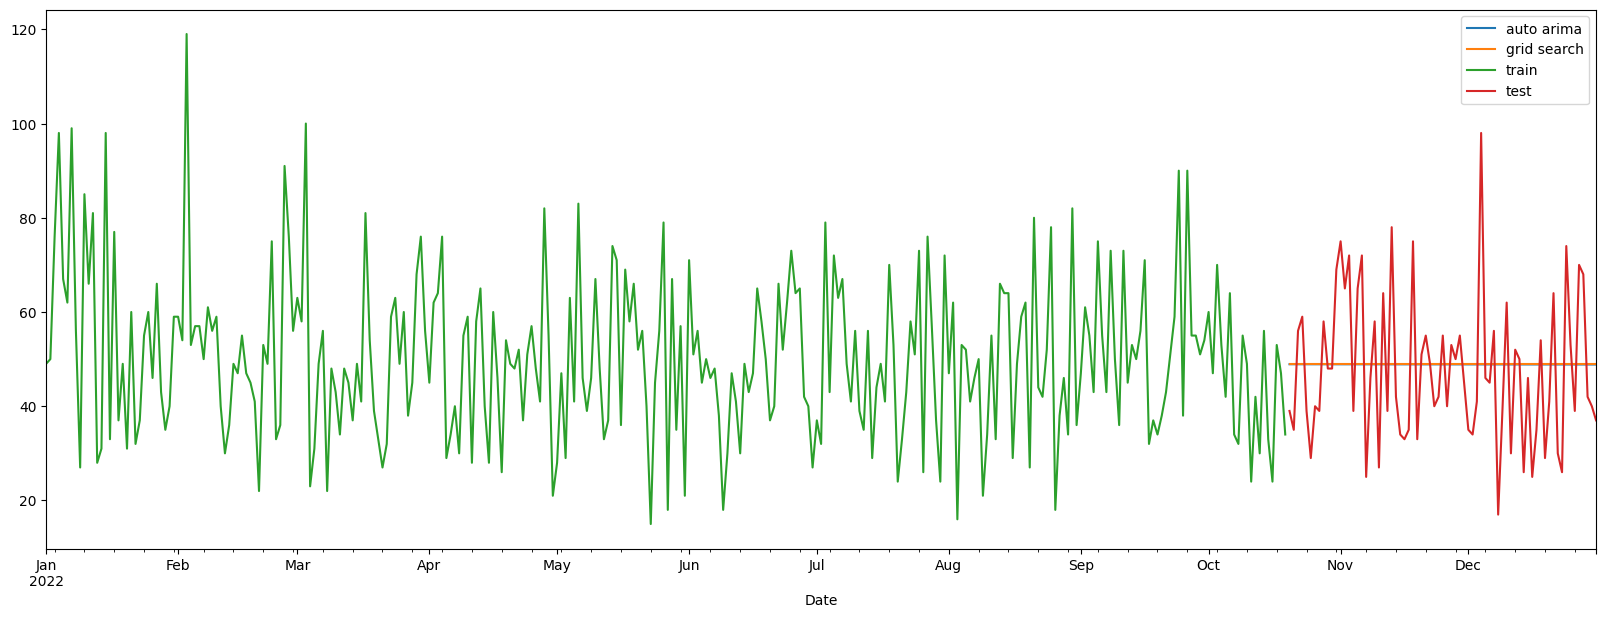

In [ ]:
# ploting
forecast.plot(label='auto arima')
preds.plot(label='grid search')

data_train.plot(label='train')
data_test.plot(label='test')
plt.legend()

While both methods, Auto ARIMA and grid search, are useful in selecting optimal parameters for the ARIMA model, in this case, the use of grid **search seems more appropriate**.

#### Evaluate Model

In [ ]:
# Calculate RMSE for training data
train_predictions = model_fit.predict(start=data_train.index[0], end=data_train.index[-1])
train_rmse = np.sqrt(mean_squared_error(data_train, train_predictions))

# Calculate RMSE for testing data
test_rmse = np.sqrt(mean_squared_error(data_test, preds))

print(f"RMSE for Training Data: {train_rmse:.2f}")
print(f"RMSE for Testing Data: {test_rmse:.2f}")

RMSE for Training Data: 17.40
RMSE for Testing Data: 15.54


<Axes: xlabel='Date'>

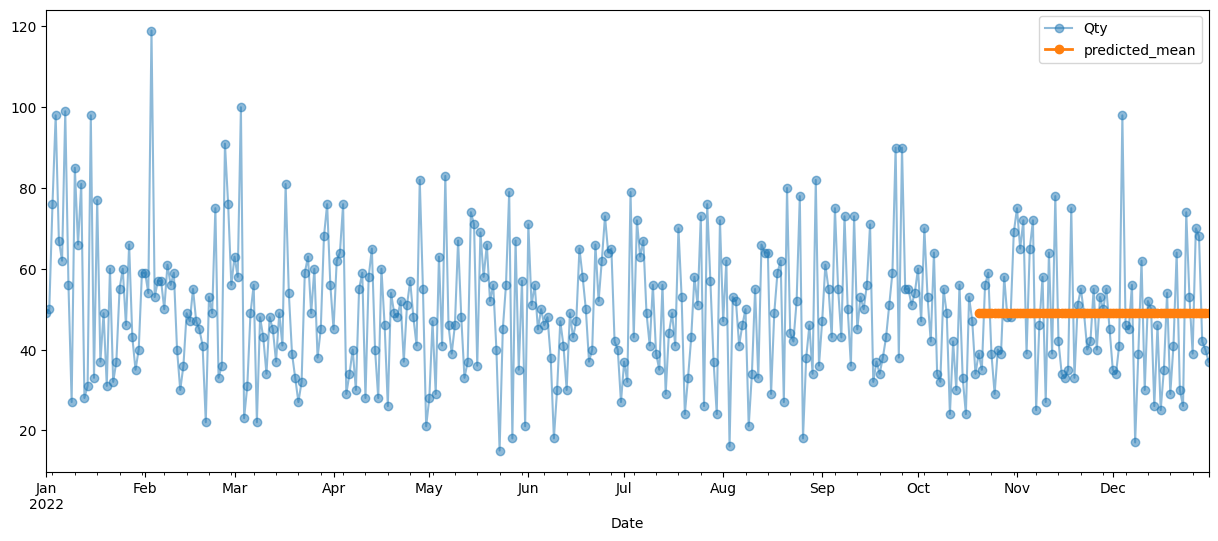

In [ ]:
df_totalquantity.plot(figsize=(15, 6), alpha=0.5, marker="o")
preds.plot(linewidth=2, marker="o", legend=True)

The parameter values p = 2, d = 1, and q = 3 resulted in an RMSE value of 15.54 dan RMSE for Training Data is 17.40.

The difference between the RMSE values for training (17.40) and testing (15.54) is not too large suggests that the model is not overfitting. A smaller difference indicates that the model is generalizing reasonably well to unseen data.

##### Forecasting 30 days using p = 2, d = 1 and q=3

<Axes: >

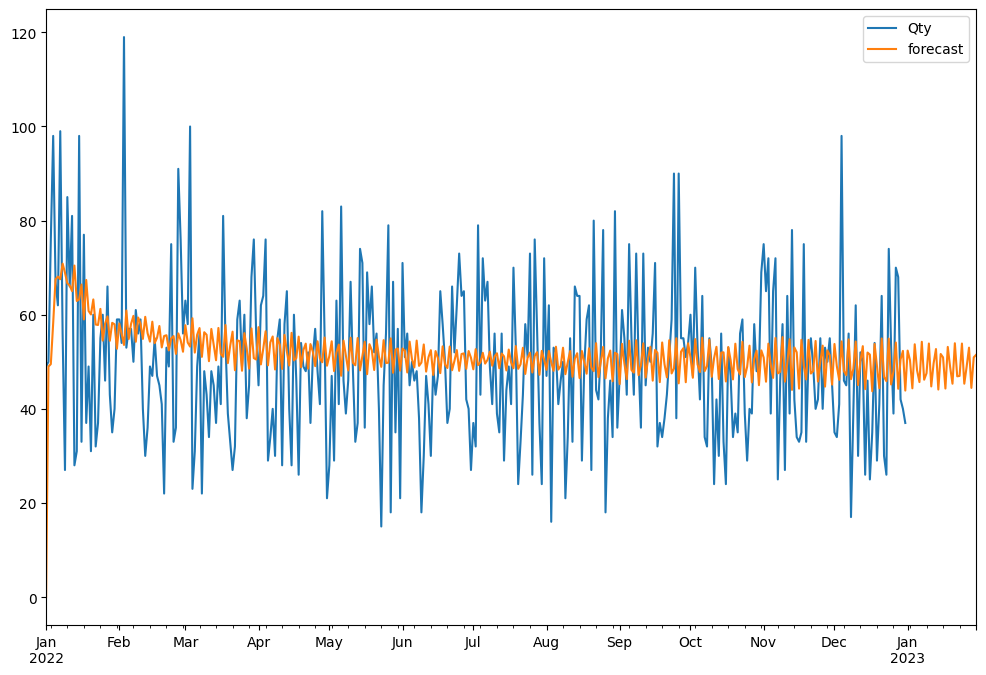

In [ ]:
from pandas.tseries.offsets import DateOffset

future_dates=[df_totalquantity.index[-1]+ DateOffset(days=x)for x in range(0,31)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df_totalquantity.columns)

future_df = pd.concat([df_totalquantity,future_dates_df])

model=ARIMA(df_totalquantity['Qty'], order=(2,1,3))
model_fit=model.fit()

future_df['forecast'] = model_fit.predict(start = 0, end = 395, dynamic = False)
future_df[['Qty', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df.tail(30).mean()

Qty               NaN
forecast    49.265631
dtype: float64

**Conclusion**

1. The ARIMA parameters, namely p, d, and q, are set to 2, 1, and 3, respectively.
2. The RMSE values for the training and testing datasets are 17.40 and 15.54, respectively.
3. No Overfitting Detected: The model is not exhibiting overfitting.
4. Exploring Alternative Time Series Algorithms: Let's try utilizing different time series algorithms.

### Customer Clustering

**Problem Statement:** As a Data Scientist at Kalbe Nutritionals, you have been assigned by the marketing team to create customer clusters/segments based on several criteria.

**Objective:** Create effective customer segmentation. These customer segments will serve as the foundation for the marketing team to provide personalized promotions and sales treatments tailored to each segment.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# scalling
from sklearn.preprocessing import StandardScaler
# modelling
from sklearn.cluster import KMeans
#silhoute
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      4976 non-null   int64         
 1   Age             4976 non-null   int64         
 2   Gender          4976 non-null   int64         
 3   Marital Status  4976 non-null   object        
 4   Income          4976 non-null   float64       
 5   TransactionID   4976 non-null   object        
 6   Date            4976 non-null   datetime64[ns]
 7   ProductID       4976 non-null   object        
 8   Price           4976 non-null   int64         
 9   Qty             4976 non-null   int64         
 10  TotalAmount     4976 non-null   int64         
 11  StoreID         4976 non-null   int64         
 12  Product Name    4976 non-null   object        
 13  StoreName       4976 non-null   object        
 14  GroupStore      4976 non-null   object        
 15  Type

In [ ]:
df_merge.shape

(4976, 18)

##### Data Aggregation

In [ ]:
aggregated_data = df_merge.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [ ]:
aggregated_data.rename(columns={'TransactionID' : "TotalTransaction", 'Qty' : 'TotalQuantity'})

,CustomerID,TotalTransaction,TotalQuantity,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
439,442,13,37,269400
440,444,18,62,577700
441,445,18,68,587200
442,446,11,42,423300


In [ ]:
aggregated_data.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     444 non-null    int64
 1   TransactionID  444 non-null    int64
 2   Qty            444 non-null    int64
 3   TotalAmount    444 non-null    int64
dtypes: int64(4)
memory usage: 14.0 KB


In [ ]:
aggregated_data.describe()

,CustomerID,TransactionID,Qty,TotalAmount
count,444.000000,444.000000,444.000000,444.000000
mean,223.556306,11.207207,40.822072,361641.216216
std,128.475517,3.242960,12.723926,124596.157539
min,1.000000,3.000000,10.000000,92100.000000
25%,112.750000,9.000000,32.000000,270675.000000
50%,223.500000,11.000000,40.000000,353200.000000
75%,334.250000,13.000000,50.000000,439750.000000
max,447.000000,21.000000,79.000000,846700.000000


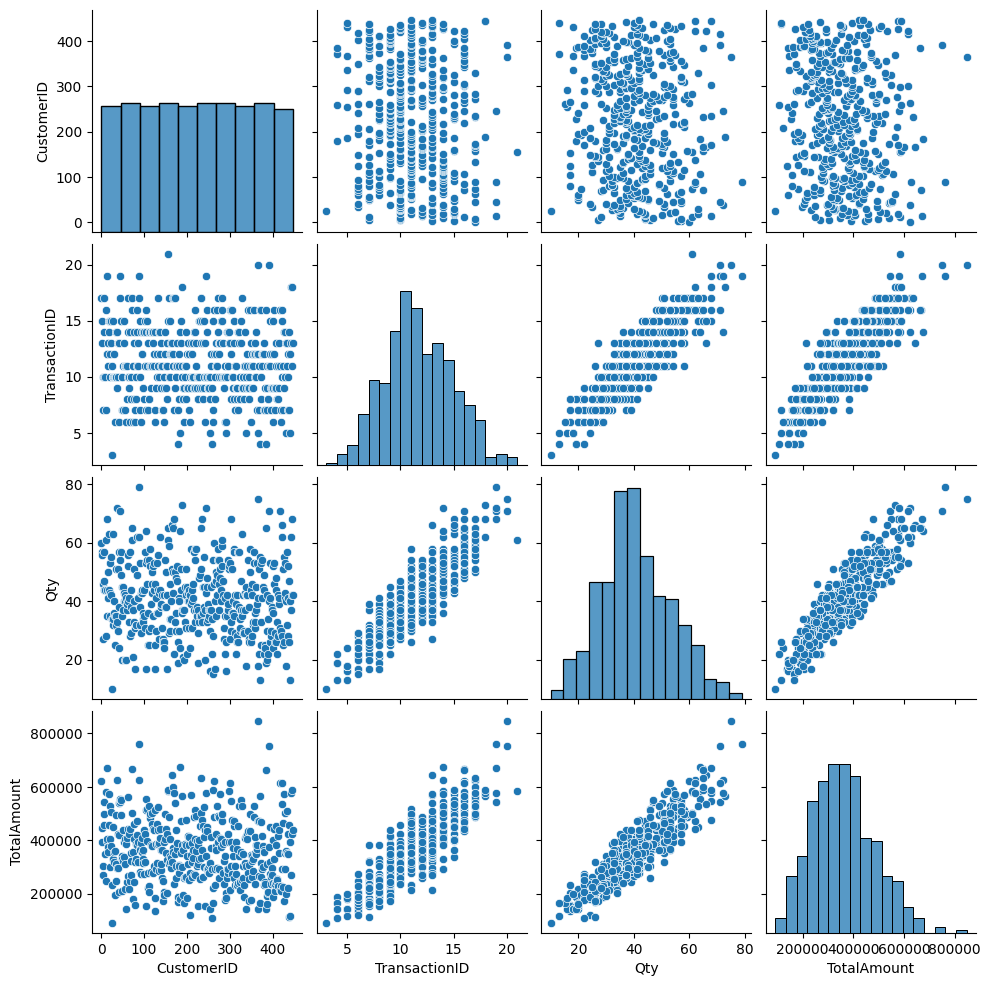

In [ ]:
sns.pairplot(data = aggregated_data)

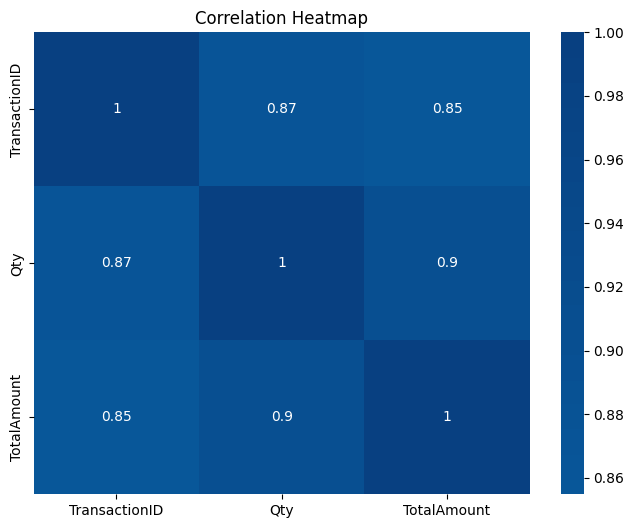

In [ ]:
#Menghitung korelasi antara variabel
correlation_matrix = aggregated_data[['TransactionID','Qty', 'TotalAmount']].corr()

#Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', center=0)
plt.title('Correlation Heatmap')
plt.show()

A strong correlation between features can indicate the presence of clear clusters within the data.

#### K Means

In [ ]:
#Scaling
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(aggregated_data[['TransactionID','Qty', 'TotalAmount']].astype(float))

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['TransactionID','Qty', 'TotalAmount'])

In [ ]:
new_dfoutlier_std.head()

,TransactionID,Qty,TotalAmount
0,1.788282,1.508934,2.102424
1,0.553450,1.272891,0.246343
2,1.170866,1.194211,0.679428
3,-0.372675,0.407403,-0.475199
4,-1.298799,-1.087531,-0.747585


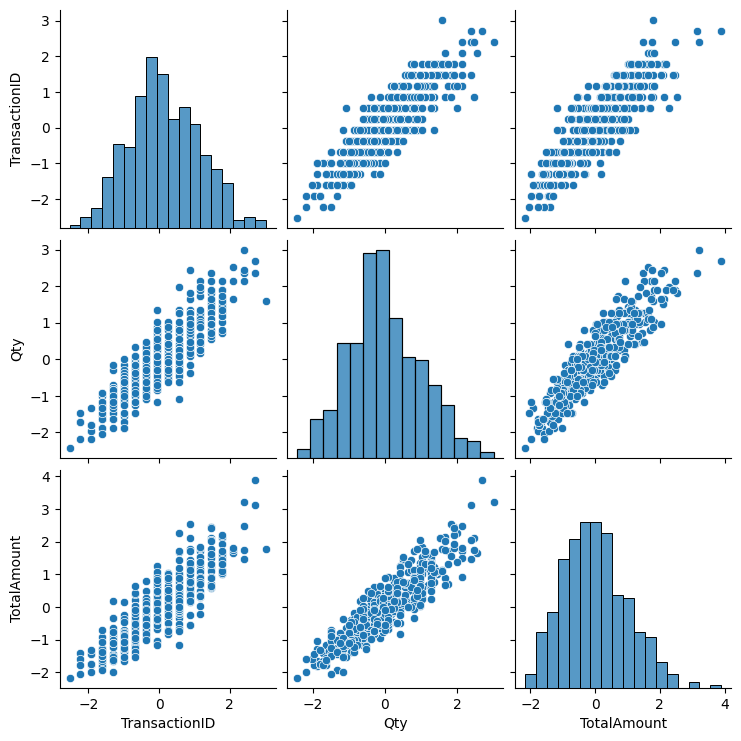

In [ ]:
sns.pairplot(new_dfoutlier_std)

- Choose Best K

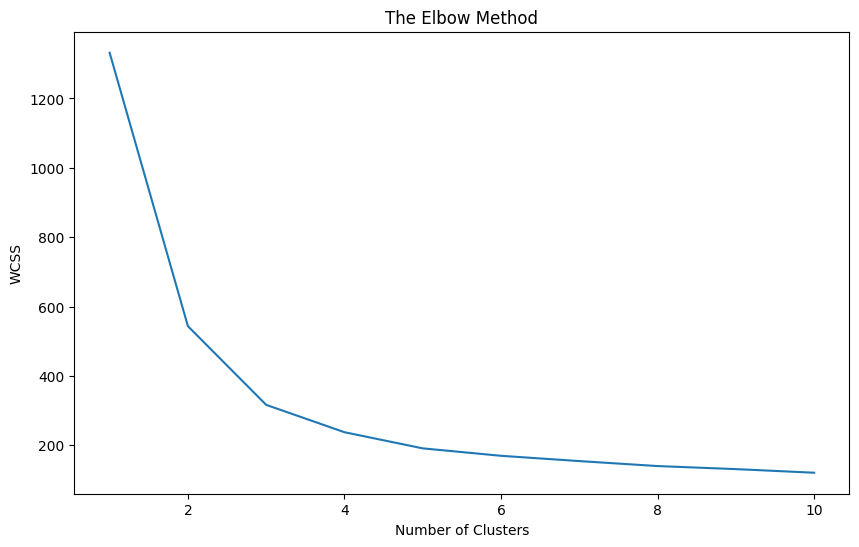

In [ ]:
#Elbow Method
#declare Within-Cluster Sum of Squares (wcss)
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(new_dfoutlier_std)
  wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

from elbow we can choose 3 or 4 cluster.

so we can u silhoute method to find the best number of cluster.

In [ ]:
#Silhoute Method
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=42).fit(new_dfoutlier_std).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(new_dfoutlier_std,labels,metric="euclidean",random_state=42)))

Silhouette score for k(clusters) = 2 is 0.4835182946272509
Silhouette score for k(clusters) = 3 is 0.4281636407220776
Silhouette score for k(clusters) = 4 is 0.37928923222405875
Silhouette score for k(clusters) = 5 is 0.3434371441372868
Silhouette score for k(clusters) = 6 is 0.2964816846357822
Silhouette score for k(clusters) = 7 is 0.2898134898109198
Silhouette score for k(clusters) = 8 is 0.2829246923726781
Silhouette score for k(clusters) = 9 is 0.28711773859951323
Silhouette score for k(clusters) = 10 is 0.26845351827090014
Silhouette score for k(clusters) = 11 is 0.25102036970925845
Silhouette score for k(clusters) = 12 is 0.260695180472588


from silhoutte score, 2 is the best number of cluster but for this case we will use 3 clusters.

In [ ]:
#k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(new_dfoutlier_std)
labels = kmeans.labels_
new_dfoutlier_std['label_kmeans'] = labels

In [ ]:
new_dfoutlier_std.head()

,TransactionID,Qty,TotalAmount,label_kmeans
0,1.788282,1.508934,2.102424,2
1,0.553450,1.272891,0.246343,2
2,1.170866,1.194211,0.679428,2
3,-0.372675,0.407403,-0.475199,1
4,-1.298799,-1.087531,-0.747585,0


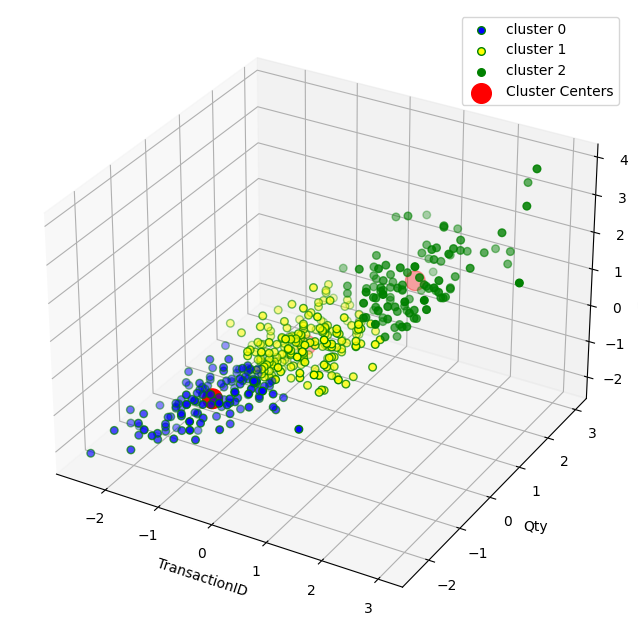

In [ ]:
colors_cluster=['blue','yellow', 'green']
label_cluster=['cluster 0', 'cluster 1', "cluster 2"]

# PLOTTING
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for points in clusters
for cluster_id in range(3):
    cluster_data = new_dfoutlier_std[new_dfoutlier_std["label_kmeans"] == cluster_id]
    ax.scatter(cluster_data["TransactionID"], cluster_data["Qty"], cluster_data["TotalAmount"],
               c=colors_cluster[cluster_id], s=30, edgecolor='green', label=label_cluster[cluster_id])

# Scatter plot for cluster centers (red)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, label='Cluster Centers')

# Set labels and legend
ax.set_xlabel('TransactionID')
ax.set_ylabel('Qty')
ax.set_zlabel('TotalAmount')
ax.legend()

plt.show()

In [ ]:
#copy label cluster to origin data
df_customer_clustering = aggregated_data.copy()
df_customer_clustering['cluster'] = kmeans.labels_

In [ ]:
df_customer_clustering.head()

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,2
1,2,13,57,392300,2
2,3,15,56,446200,2
3,4,10,46,302500,1
4,5,7,27,268600,0


In [ ]:
# Calculate the average metrics for each cluster, including customer count, mean TotalTransaction, mean TotalQuantity, and mean TotalAmount.
df_customer_clustering.groupby('cluster').agg({'CustomerID':'count',
                                               'TransactionID':'mean',
                                               'Qty':'mean',
                                               'TotalAmount':'mean'
                                               }).sort_values(by='TotalAmount').reset_index()

,cluster,CustomerID,TransactionID,Qty,TotalAmount
0,0,135,7.785185,26.933333,229388.888889
1,1,202,11.282178,41.188119,363267.326733
2,2,107,15.383178,57.654206,525431.775701


Cluster 2 has the highest number of customers.

Cluster 0 (Moderate Spenders): This indicates that customers in this cluster tend to make purchases of moderate quantity and value.

Cluster 1 (High Value Shoppers): This suggests that customers in this cluster tend to make purchases with a high monetary value.

Cluster 2 (Balanced Shoppers): This implies that customers in this cluster exhibit balanced purchasing behavior in terms of both quantity and value.

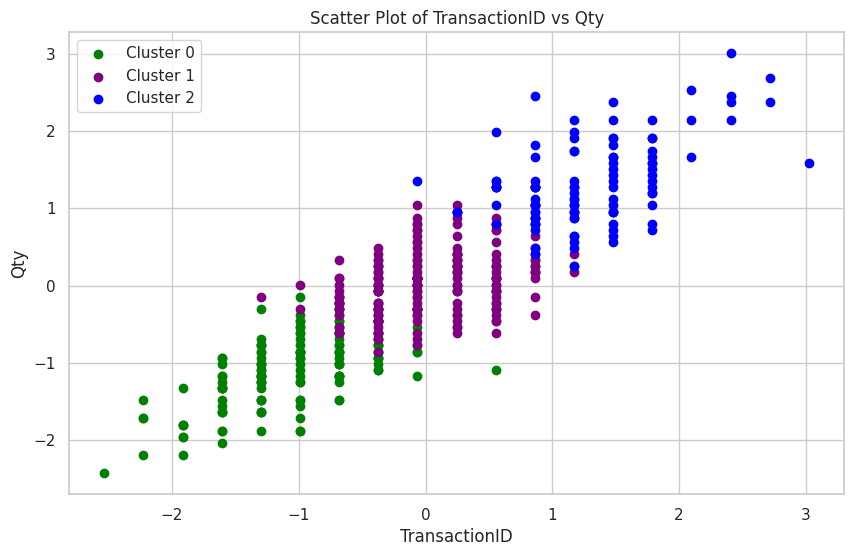

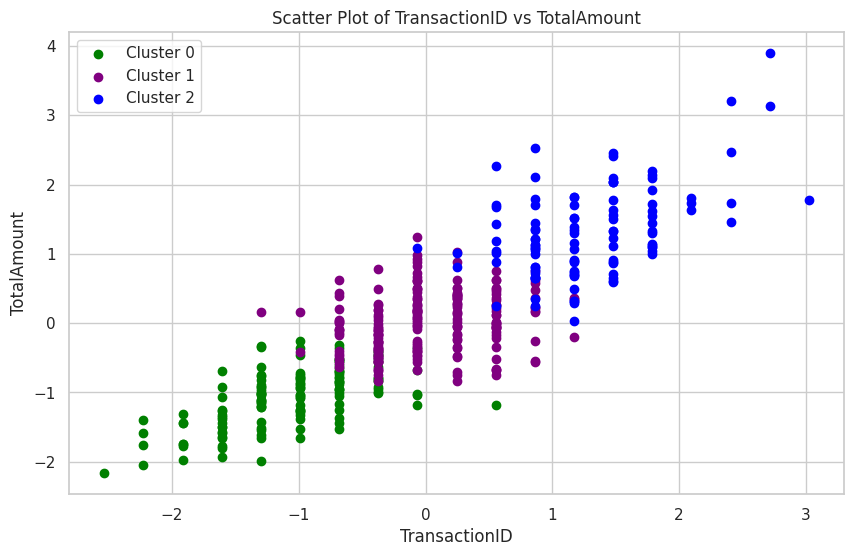

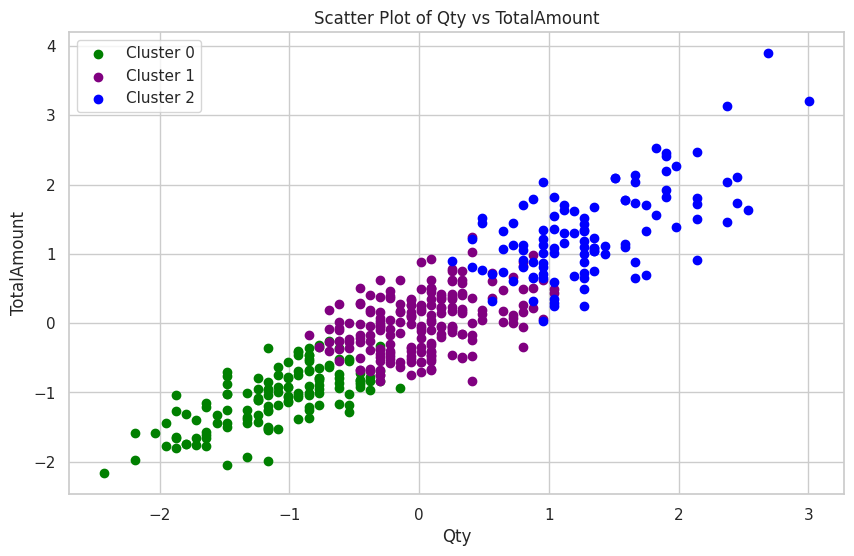

In [ ]:
# Set style
sns.set(style="whitegrid")

# Define colors for clusters
cluster_colors = ['green', 'purple','blue']

# Create scatter plots for each feature pair
feature_pairs = [('TransactionID', 'Qty'), ('TransactionID', 'TotalAmount'), ('Qty', 'TotalAmount')]

for pair in feature_pairs:
    plt.figure(figsize=(10, 6))
    for cluster_num in range(len(cluster_colors)):
        cluster_data = new_dfoutlier_std[new_dfoutlier_std.label_kmeans == cluster_num]
        plt.scatter(cluster_data[pair[0]], cluster_data[pair[1]], color=cluster_colors[cluster_num], label=f'Cluster {cluster_num}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.legend()
    plt.show()

##### Conclusion

**Cluster 0 (Moderate Spenders):**

Marketing Strategy: Encourage them to shop more frequently to increase their transaction value. Send marketing product notifications via email.
Promotions: Offer special promotions and discounts to motivate this cluster to shop more.
Other Initiatives: Provide incentives such as small points or rewards every time they make a purchase, empowering them to engage in transactions more frequently.

**Cluster 2 (Balanced Shoppers):**

Marketing Strategy: Customers in this cluster have medium transaction values, indicating they are moderately active. Focus on maintaining their activity level and building further engagement.
Promotions: Offer exclusive discounts or special deals available only to customers in this cluster as a form of appreciation.
Loyalty Program: Provide points or rewards each time they make a purchase. This can enhance engagement and build long-term relationships.

**Cluster 1 (High-Value Shoppers):**

Marketing Strategy: Focus on maintaining strong relationships with customers in this cluster, as they significantly contribute to the business.
Premium Loyalty Program: Introduce a premium loyalty program that offers additional benefits to customers in this cluster. This could include exclusive discounts, early access to new products, or luxurious rewards.
Cross-Selling and Up-Selling: Based on their previous purchasing patterns, offer complementary products or higher-value items to increase their transaction value.